### 提供一个从入门到精通的Scipy odeint使用示例，逐步讲解如何用它求解微分方程。从简单的一阶微分方程开始，逐步过渡到复杂的多阶系统。

#### 1. 基础示例：一阶微分方程

先从一个简单的指数衰减模型开始：微分方程: $\frac{dy}{dt} = -k * y$, 初始条件 $y(0) = 1$, 其中 $k$ 是衰减常数。

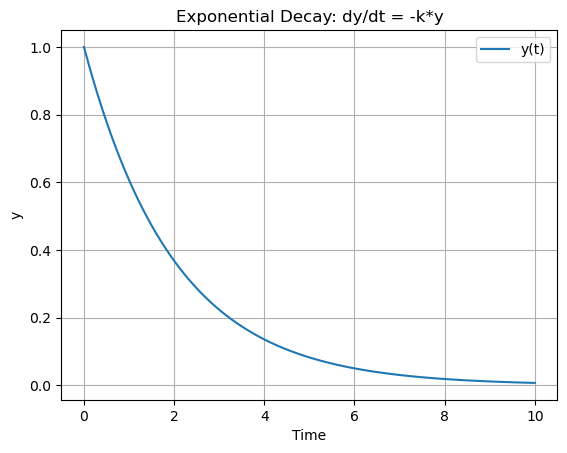

In [2]:
import numpy as np
from scipy.integrate import odeint 
import matplotlib.pyplot as plt 

# 定义微分方程
def dy_dt(y,t,k):
    return -k*y

# 参数
k = 0.5
y0 = 1.0 # 初始条件
t = np.linspace(0,10,100) # 时间数组，从0到10

# 使用odeint求解
y = odeint(dy_dt,y0,t,args=(k,))

# 绘图
plt.plot(t,y,label='y(t)')
plt.xlabel('Time')
plt.ylabel('y')
plt.title('Exponential Decay: dy/dt = -k*y')
plt.legend()
plt.grid()
plt.show()


##### 解释

* dy-dt 是描述微分方程的函数，输入当前状态 y、时间 t 和参数 k。
* odeint 是参数依次是：微分方程函数、初始条件、时间数组、可选参数 args。
* 结果 y 是对应时间点上的解。

#### 2. 进阶示例：二阶微分方程（阻尼振荡器）

二阶常系数齐次常微分方程标准形式为 

现在解决一个二阶微分方程，比如阻尼振荡器：

$\frac{d^2x}{dt^2} + 2\zeta \omega \frac{dx}{dt} + \omega^2 x = 0$, 初始条件 $x(0) = 1, \frac{dx}{dt}(0) = 0$.


二阶方程需要转化为一阶方程组：

* 令 $y0 = x, y1 = \frac{dx}{dt}$,
* 则 $\frac{dy0}{dt} = y1, \frac{dy1}{dt} = -\omega^2 y0 - 2 \zeta \omega y1$。

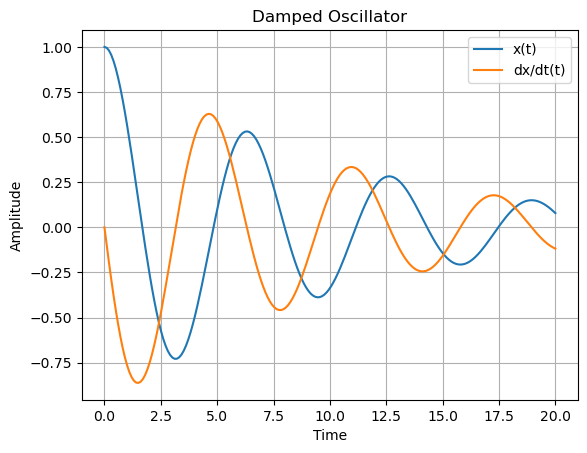

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 定义微分方程组
def ocillator(y,t,zeta,omega):
    y0,y1=y # y0=x, y1 = dx/dt
    dy0_dt = y1
    dy1_dt = -omega**2*y0 - 2*zeta*omega*y1
    return [dy0_dt,dy1_dt]

# 参数
zeta = 0.1 # 阻尼比
omega = 1.0 # 自然频率
y0 = [1.0,0.0] # 初始条件【x(0),dx/dt(0)]
t = np.linspace(0,20,200)

# 求解
sol = odeint(ocillator, y0, t, args=(zeta, omega))

# 绘图
plt.plot(t, sol[:,0],label='x(t)')
plt.plot(t,sol[:,1],label='dx/dt(t)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Damped Oscillator')
plt.legend()
plt.grid()
plt.show()


#### 3. 高级示例：带外力的非线性系统（范德波尔振荡器）

范德波尔振荡器是一个非线性微分方程：

$\frac{d^2x}{dt^2} - \mu (1+x^2) \frac{dx}{dt} + x = 0$。

转化为一阶方程组：

* $y0=x,y1=\frac{dx}{dt}$,
* $\frac{dy0}{dt}=y1,\frac{dy1}{dt}=\mu (1-y0)y1-y0$。

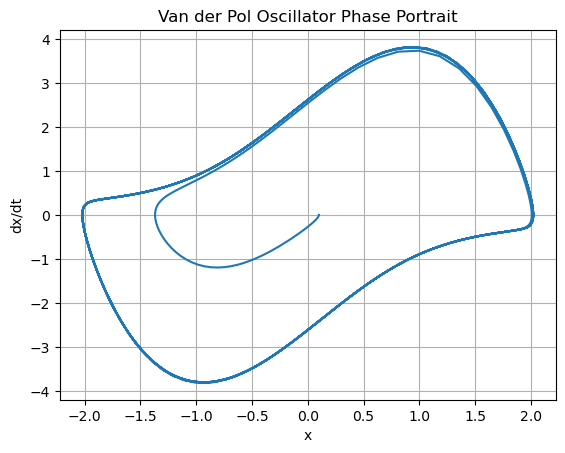

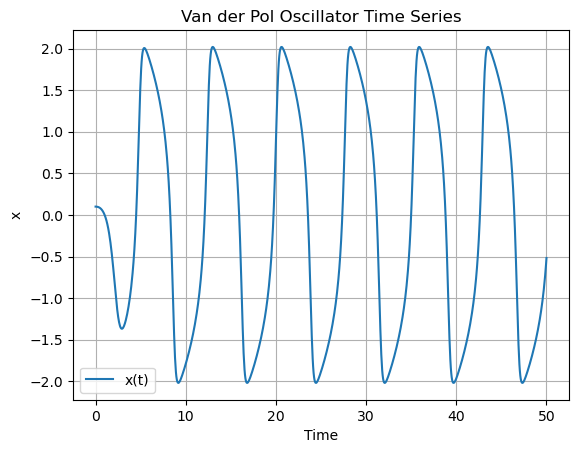

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt 

# 定义范德波尔振荡器
def vanderpol(y,t,mu):
    y0,y1 = y
    dy0_dt = y1
    dy1_dt = mu * (1-y0**2)*y1 - y0
    return [dy0_dt,dy1_dt]

# 参数
mu = 2.0 # 非线性阻尼参数
y0 = [0.1,0.0] #初始条件
t = np.linspace(0,50,1000)

# 求解
sol = odeint(vanderpol,y0,t,args=(mu,))

# 绘制相图
plt.plot(sol[:,0],sol[:,1])
plt.xlabel('x')
plt.ylabel('dx/dt')
plt.title('Van der Pol Oscillator Phase Portrait')
plt.grid()
plt.show()

# 绘制时间序列
plt.plot(t,sol[:,0],label = 'x(t)')
plt.xlabel('Time')
plt.ylabel('x')
plt.title('Van der Pol Oscillator Time Series')
plt.legend()
plt.grid()
plt.show()